In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file="KPMG_VI_New_MOD_data_update_final.xlsx"
transDf=pd.read_excel(file,sheet_name="Transactions")
transDf.head()

,transaction_id,product_id,customer_id,Age,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,9792,60,34,21.0,2017-06-25,1.0,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,2011-08-24
1,4736,51,422,21.0,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,2012-04-10
2,17611,47,3435,21.0,2017-02-02,0.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2006-10-01
3,6202,27,66,21.0,2017-02-17,0.0,Approved,Trek Bicycles,Standard,low,medium,1057.51,154.40,1994-07-12
4,7374,90,66,21.0,2017-02-28,1.0,Approved,Solex,Standard,low,medium,945.04,507.58,1995-12-19


In [3]:
transDf.describe()

,transaction_id,product_id,customer_id,Age,online_order,list_price,standard_cost
count,20000.000000,20000.00000,20000.000000,19541.000000,19640.000000,20000.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,45.845248,0.500458,1107.829449,556.046951
std,5773.647028,30.75359,1011.951046,12.597375,0.500013,582.825242,405.955660
min,1.000000,0.00000,1.000000,21.000000,0.000000,12.010000,7.210000
25%,5000.750000,18.00000,857.750000,36.000000,0.000000,575.270000,215.140000
50%,10000.500000,44.00000,1736.000000,46.000000,1.000000,1163.890000,507.580000
75%,15000.250000,72.00000,2613.000000,55.000000,1.000000,1635.300000,795.100000
max,20000.000000,100.00000,5034.000000,92.000000,1.000000,2091.470000,1759.850000


In [4]:
transDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   Age                      19541 non-null  float64       
 4   transaction_date         20000 non-null  datetime64[ns]
 5   online_order             19640 non-null  float64       
 6   order_status             20000 non-null  object        
 7   brand                    19803 non-null  object        
 8   product_line             19803 non-null  object        
 9   product_class            19803 non-null  object        
 10  product_size             19803 non-null  object        
 11  list_price               20000 non-null  float64       
 12  standard_cost            19803 n

In [5]:
transDf.online_order.replace({"True":1,"False":0},inplace=True)
transDf.head()

,transaction_id,product_id,customer_id,Age,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,9792,60,34,21.0,2017-06-25,1.0,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,2011-08-24
1,4736,51,422,21.0,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,2012-04-10
2,17611,47,3435,21.0,2017-02-02,0.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2006-10-01
3,6202,27,66,21.0,2017-02-17,0.0,Approved,Trek Bicycles,Standard,low,medium,1057.51,154.40,1994-07-12
4,7374,90,66,21.0,2017-02-28,1.0,Approved,Solex,Standard,low,medium,945.04,507.58,1995-12-19


### Age Distribution Study

In [6]:
def remove_outliers_zscore(dataframe, threshold=3):
    z_scores = np.abs((dataframe - dataframe.mean()) / dataframe.std())
    return dataframe[(z_scores < threshold)]

# Age outliers removal -----------------------------------------------------
Ages_outliers_removed=remove_outliers_zscore(transDf.Age.dropna(axis=0),2.1)

In [7]:
before=px.histogram(transDf.Age,title='''Before removing "na" and "Outliers"''').show()
after=px.histogram(Ages_outliers_removed,title='''After removing "na" and "Outliers"''').show()
# print(after.show(),before.show())

## A function to handle the distribution plots

In [8]:
from scipy import stats 
def dist(dataframe,xlabel,ylabel,title):
    mu = dataframe.mean()
    std =dataframe.std()
    snd = stats.norm(mu, std)

    x = np.array(dataframe)

    plt.figure(figsize=(10,3))
    plt.plot(x,snd.pdf(x))
    plt.title(title, fontsize='15')
    plt.xlabel(xlabel, fontsize='15')
    plt.ylabel(ylabel, fontsize='15')
    return plt.show()

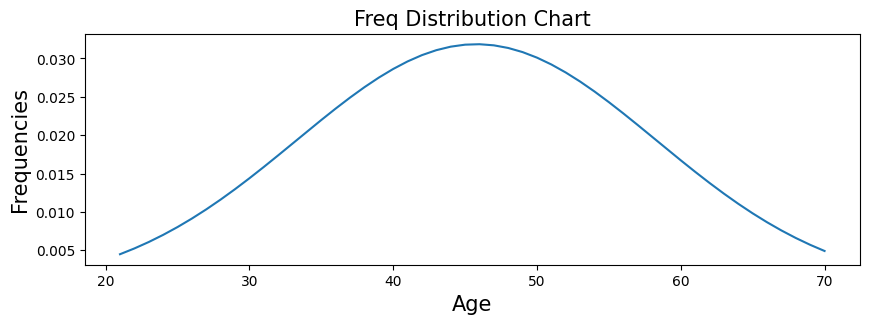

In [9]:
dist(Ages_outliers_removed,"Age","Frequencies","Freq Distribution Chart")

In [10]:
px.box(transDf["Age"],title="Outliers in Age Before removing NA and Oultiers")


In [11]:
px.box(Ages_outliers_removed,title="Outliers in Age After removing NA and Oultiers")

In [59]:
meanT=transDf.Age.mean()
stdT=transDf.Age.std()
print("1 SD range is from ", round(meanT-stdT,2), " to ", round((meanT+stdT),2),r" : Having 68.2 % of Records")
print("2 SD range is from ", round(meanT-stdT*2,2), " to ", round((meanT+stdT*2),2),r" : Having 95.44 % of Records")

1 SD range is from  33.25  to  58.44  : Having 68.2 % of Records
2 SD range is from  20.65  to  71.04  : Having 95.44 % of Records


## New Customer List Dataframe --------------------------------------------

In [12]:
file="KPMG_VI_New_MOD_data_update_final.xlsx"
NCLDf=pd.read_excel(file,sheet_name="NewCustomerList", usecols=(0,1,2,3,4,5,6,7,8,9,10,11,13,14,15,22))
NCLDf.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,state,country,Rank
0,Chickie,Brister,Male,86.0,1957-07-12,66.0,General Manager,Manufacturing,Mass Customer,N,1.0,14.0,4500.0,QLD,Australia,1.0
1,Ardelis,Forrester,Female,10.0,1974-08-28,49.0,Senior Cost Accountant,Financial Services,Affluent Customer,N,0.0,10.0,3505.0,VIC,Australia,1.0
2,Morly,Genery,Male,69.0,1970-03-22,53.0,Structural Engineer,Property,Mass Customer,N,0.0,16.0,2113.0,NSW,Australia,1.0
3,Lucine,Stutt,Female,64.0,1979-01-28,44.0,Account Representative III,Manufacturing,Affluent Customer,N,1.0,5.0,4814.0,QLD,Australia,4.0
4,Melinda,Hadlee,Female,34.0,1965-09-21,58.0,Financial Analyst,Financial Services,Affluent Customer,N,0.0,19.0,2093.0,NSW,Australia,4.0


In [13]:
NCLDf.describe()

,past_3_years_bike_related_purchases,Age,owns_car,tenure,postcode,Rank
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,52.270000,0.493000,11.388000,3019.227000,498.819000
std,27.796686,16.963162,0.500201,5.037145,848.895767,288.810997
min,0.000000,21.000000,0.000000,0.000000,2000.000000,1.000000
25%,26.750000,40.750000,0.000000,7.000000,2209.000000,250.000000
50%,51.000000,51.000000,0.000000,11.000000,2800.000000,500.000000
75%,72.000000,66.000000,1.000000,15.000000,3845.500000,750.250000
max,99.000000,85.000000,1.000000,22.000000,4879.000000,1000.000000


In [14]:
NCLDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   float64       
 4   DOB                                  1000 non-null   datetime64[ns]
 5   Age                                  1000 non-null   float64       
 6   job_title                            988 non-null    object        
 7   job_industry_category                835 non-null    object        
 8   wealth_segment                       1000 non-null   object        
 9   deceased_indicator                   1000 non-null   object        
 10  owns_car    

In [15]:
px.box(NCLDf.Age)

Clean Age column, Ready to create a freq distribution curve.

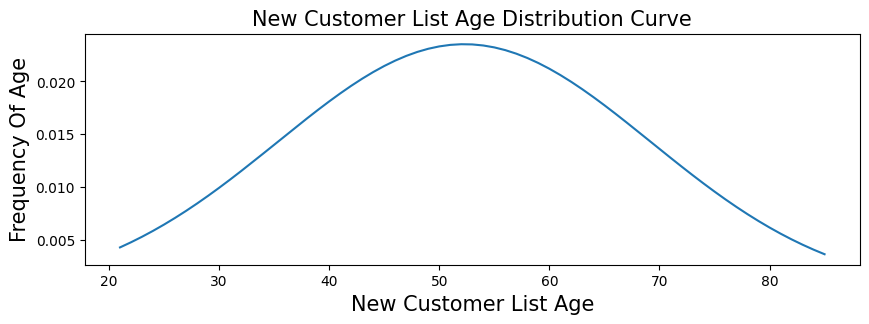

In [54]:
dist(NCLDf.Age.sort_values(),"New Customer List Age","Frequency Of Age","New Customer List Age Distribution Curve")

In [24]:
print(NCLDf.Age.mean(),"\n",NCLDf.Age.std())

52.27 
 16.963161522807265


### FILTER No. 1 : AGE
##### Ages as under 2nd SD (95.44%) in existing customer list in range of 20.59 to 71.04 yrs

In [60]:
newAge_1SD=NCLDf[NCLDf.Age > 20.59][NCLDf.Age<71.04]
newAge_1SD

C:\Users\MAYANK\AppData\Local\Temp\ipykernel_12300\493320519.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,state,country,Rank
0,Chickie,Brister,Male,86.0,1957-07-12,66.0,General Manager,Manufacturing,Mass Customer,N,1.0,14.0,4500.0,QLD,Australia,1.0
1,Ardelis,Forrester,Female,10.0,1974-08-28,49.0,Senior Cost Accountant,Financial Services,Affluent Customer,N,0.0,10.0,3505.0,VIC,Australia,1.0
2,Morly,Genery,Male,69.0,1970-03-22,53.0,Structural Engineer,Property,Mass Customer,N,0.0,16.0,2113.0,NSW,Australia,1.0
3,Lucine,Stutt,Female,64.0,1979-01-28,44.0,Account Representative III,Manufacturing,Affluent Customer,N,1.0,5.0,4814.0,QLD,Australia,4.0
4,Melinda,Hadlee,Female,34.0,1965-09-21,58.0,Financial Analyst,Financial Services,Affluent Customer,N,0.0,19.0,2093.0,NSW,Australia,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60.0,1959-10-07,64.0,Paralegal,Manufacturing,Affluent Customer,N,0.0,9.0,2200.0,NSW,Australia,996.0
996,Melloney,Temby,Female,17.0,1954-10-05,69.0,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,1.0,15.0,4702.0,QLD,Australia,997.0
997,Dickie,Cubbini,Male,30.0,1952-12-17,71.0,Financial Advisor,Financial Services,Mass Customer,N,1.0,19.0,4215.0,QLD,Australia,997.0
998,Burk,Wortley,Male,22.0,2001-10-17,22.0,Senior Sales Associate,Health,Mass Customer,N,0.0,6.0,2196.0,NSW,Australia,997.0


After applying AGE Filter we found out about 850 out of 1000 New Customer List record to be in Potential Custemer Zone.

### FILTER No. 2 : past_3_yrs_bike_related_purchases 
##### 2st SD are in range of 

In [ ]:
### FILTER No. 1 : AGE
##### Ages under 1st SD are in range of 35.2 to 69.2 yrs

## Customer Demographic Dataframe --------------------------------------------

In [36]:
file="KPMG_VI_New_MOD_data_update_final.xlsx"
demoDf=pd.read_excel(file,sheet_name="CustomerDemographic")
demoDf.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,720,Darrel,Canet,Male,67,1931-10-23,92.0,Recruiting Manager,Retail,Affluent Customer,N,No,6.0
1,1092,Katlin,Creddon,Female,56,1935-08-22,88.0,VP Quality Control,Retail,Mass Customer,N,No,5.0
2,3410,Merrili,Brittin,Female,93,1940-09-22,83.0,NaN,Property,Mass Customer,N,No,16.0
3,2413,Abbey,Murrow,Male,27,1943-08-11,80.0,Environmental Specialist,Manufacturing,High Net Worth,N,Yes,17.0
4,658,Donn,Bonnell,Male,38,1944-01-24,79.0,Tax Accountant,Manufacturing,Affluent Customer,N,Yes,8.0


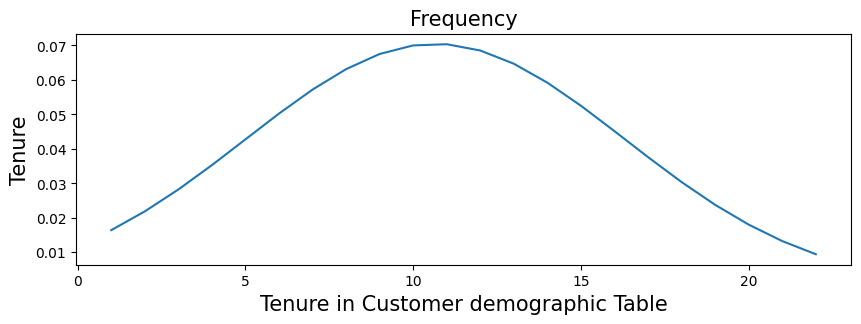

In [53]:
dist(demoDf.tenure.sort_values(),"Tenure in Customer demographic Table","Tenure","Frequency")

In [58]:
meanT=transDf.Age.mean()
stdT=transDf.Age.std()
print("1 SD range is from ", round(meanT-stdT,2), " to ", round((meanT+stdT),2),r" : Having 68.2 % of Records")
print("2 SD range is from ", round(meanT-stdT*2,2), " to ", round((meanT+stdT*2),2), r" : Having 95.4 % of Records")

1 SD range is from  33.25  to  58.44  : Having 68.2 % of Records
2 SD range is from  20.65  to  71.04  : Having 95.4 % of Records


In [41]:
demoDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3912 non-null   datetime64[ns]
 6   Age                                  3912 non-null   float64       
 7   job_title                            3494 non-null   object        
 8   job_industry_category                3344 non-null   object        
 9   wealth_segment                       4000 non-null   object        
 10  deceased_ind

In [43]:
demoDf.Age.dropna(axis=0,inplace=True)

In [44]:
px.box(demoDf.Age)

In [45]:
custAge_NO_ouliers=remove_outliers_zscore(demoDf.Age,2.1)
px.box(custAge_NO_ouliers,title="Customer ages after removal of Outliers")

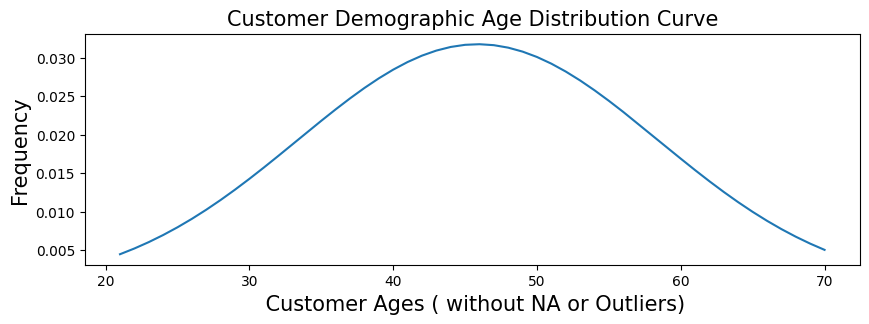

In [48]:
dist(custAge_NO_ouliers," Customer Ages ( without NA or Outliers)","Frequency","Customer Demographic Age Distribution Curve")

In [56]:
meanT=custAge_NO_ouliers.mean()
stdT=custAge_NO_ouliers.std()
print("1 SD range is from ", round(meanT-stdT,2), " to ", round((meanT+stdT),2))
print("2 SD range is from ", round(meanT-stdT*2,2), " to ", round((meanT+stdT*2),2))

1 SD range is from  33.34  to  58.43
2 SD range is from  20.79  to  70.98


After analysis it has been noticed that : Customer Demographic table has similar or same Age Distribution as observed in Transaction Table. 

## Customer Address Dataframe --------------------------------------------

In [46]:
file="KPMG_VI_New_MOD_data_update_final.xlsx"
addf=pd.read_excel(file,sheet_name="CustomerAddress")
addf.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
